# Forest Covertypes
Data Source: https://scikit-learn.org/0.16/datasets/index.html; http://archive.ics.uci.edu/ml/datasets/Covertype

The samples in this dataset correspond to 30×30m patches of forest in the US, collected for the task of predicting each patch’s cover type, i.e. the dominant species of tree. There are seven covertypes, making this a multiclass classification problem. 

### Downloading Data

In [1]:
# !pip install --upgrade scikit-learn
# !pip install scipy
# !pip3 install -U scikit-learn scipy matplotlib

# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_covtype

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
#Option 1

fc = fetch_covtype()
print(type(fc))
print(dir(fc))
# np.c_ is the numpy concatenate function which is used to concat fc['data'], fc['target'] arrays 
# for pandas column argument: concat fc['feature_names'] list and string list (in this case one string); 
# the target variable is forest cover type classes 
# Forest Cover Type Classes:      1 -- Spruce/Fir
#                                 2 -- Lodgepole Pine
#                                 3 -- Ponderosa Pine
#                                 4 -- Cottonwood/Willow
#                                 5 -- Aspen
#                                 6 -- Douglas-fir
#                                 7 -- Krummholz
df = pd.DataFrame(data= np.c_[fc['data'], fc['target']],
                     columns= fc['feature_names'] + ['target'])
df.head(3)

<class 'sklearn.utils._bunch.Bunch'>
['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [3]:
# Option2
def df2(): 
    fc = fetch_covtype()    
    data = np.c_[fc.data, fc.target]
    columns = np.append(fc.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)

df2 = df2()
df2.head(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [4]:
# Preprocessing ----1. Using preprocessing.scale() function
from sklearn.datasets import fetch_covtype
from sklearn import preprocessing
data = fetch_covtype()
 
# separate the independent and dependent variables
X_data = data.data
target = data.target
 
# standardization of dependent variables
standard = preprocessing.scale(X_data)
print(standard)

[[-1.29780509 -0.93515698 -1.48281978 ... -0.16595612 -0.15601398
  -0.12365355]
 [-1.31923485 -0.89047967 -1.61636259 ... -0.16595612 -0.15601398
  -0.12365355]
 [-0.5549068  -0.14883628 -0.68156292 ... -0.16595612 -0.15601398
  -0.12365355]
 ...
 [-2.04784663  0.02987297  0.38677957 ... -0.16595612 -0.15601398
  -0.12365355]
 [-2.05498988  0.12816306  0.11969395 ... -0.16595612 -0.15601398
  -0.12365355]
 [-2.05856151  0.08348575 -0.14739167 ... -0.16595612 -0.15601398
  -0.12365355]]


In [5]:
# Preprocessing -----2. Using StandardScaler() function
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
 
data = fetch_covtype()
scale= StandardScaler()
 
# separate the independent and dependent variables
X_data = data.data
target = data.target
 
# standardization of dependent variables
scaled_data = scale.fit_transform(X_data) 
print(scaled_data)


[[-1.29780509 -0.93515698 -1.48281978 ... -0.16595612 -0.15601398
  -0.12365355]
 [-1.31923485 -0.89047967 -1.61636259 ... -0.16595612 -0.15601398
  -0.12365355]
 [-0.5549068  -0.14883628 -0.68156292 ... -0.16595612 -0.15601398
  -0.12365355]
 ...
 [-2.04784663  0.02987297  0.38677957 ... -0.16595612 -0.15601398
  -0.12365355]
 [-2.05498988  0.12816306  0.11969395 ... -0.16595612 -0.15601398
  -0.12365355]
 [-2.05856151  0.08348575 -0.14739167 ... -0.16595612 -0.15601398
  -0.12365355]]


In [6]:
X1=fc.data

IndexError: list index out of range

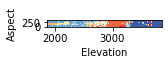

In [7]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
fc = fetch_covtype()    
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0,1],[0,2],[0,3],[0,4],[0,5],[0,6],[0,7],[0,8],[0,9],[0,10],[0,11],[0,12],[0,13],[0,14],
                               [0,15],[0,16],[0,17],[0,18],[0,19],[0,20],[0,21],[0,22],[0,23],[0,24],[0,25], [0,26],[0,27],
                               [0,28],[0,29],[0,30],[0,31],[0,32],[0,33],[0,34],[0,35],[0,36],[0,37],[0,38],[0,39],[0,40],
                               [0,41],[0,42],[0,43],[0,44],[0,45],[0,46],[0,47],[0,48],[0,49],[0,50],[0,51],[0,52],[0,53],
                               [1, 2],[1, 3],[1, 4],[1, 5],[1, 6],[1, 7],[1,8],[1,9],[1,10],[1,11],[1, 12],[1, 13],[1, 14],
                               [1, 15],[1, 16],[1, 17],[1,18],[1,19],[1,20],[1, 21],[1, 22],[1, 23],[1,24],[1,25],[1, 26],
                               [1, 27],[1,28],[1,29],[1,30],[1,31],[1, 32],[1, 33],[1, 34],[1, 35],[1, 36],[1, 37],[1,38],
                               [1,39],[1,40],[1, 41],[1, 42],[1, 43],[1, 44],[1, 45],[1, 46],[1, 47],[1,48],[1,49],[1,50],
                               [1,51],[1, 52],[1, 53],[2,3],[2,4],[2,5],[2,6],[2,7],[2, 8],[2, 9],[2, 10],[2, 11],[2,12],
                               [2,13],[2,14],[2,15],[2,16],[2,17],[2, 18],[2, 19],[2, 20],[2,21],[2,22],[2,23],[2, 24],
                               [2, 25],[2,26],[2,27],[2, 28],[2, 29],[2, 30],[2, 31],[2,32],[2,33],[2,34],[2,35],[2,36],
                               [2,37],[2, 38],[2, 39],[2, 40],[2,41],[2,42],[2,43],[2,44],[2,45],[2,46],[2,47],[2, 48],
                               [2, 49],[2, 50],[2, 51],[2,52],[2,53],[3, 3],[3, 4],[3, 5],[3, 6],[3, 7],[3,8],[3,9],[3,10],
                               [3,11],[3, 12],[3, 13],[3, 14],[3, 15],[3, 16],[3, 17],[3,18],[3,19],[3,20],[3, 21],[3, 22],
                               [3, 23],[3,24],[3,25],[3, 26],[3, 27],[3,28],[3,29],[3,30],[3,31],[3, 32],[3, 33],[3, 34],
                               [3, 35],[3, 36],[3, 37],[3,38],[3,39],[3,40],[3, 41],[3, 42],[3, 43],[3, 44],[3, 45],[3, 46],
                               [3, 47],[3,48],[3,49],[3,50],[3,51],[3, 52],[3, 53]]):
    # We only take the two corresponding features
    X = fc.data[:, pair]
    y = fc.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(9, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=fc.feature_names[pair[0]],
        ylabel=fc.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=fc.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")


In [ ]:
fc

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
fc = fetch_covtype()    
# Parameters
n_classes = 7
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6],
                                [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [3, 4], [3, 5], [3, 6], [3, 7],[4, 5], [4, 6], [4, 7],
                                [5, 6], [5, 7],[6, 7]]):
    # We only take the two corresponding features
    X = fc.data[:, pair]
    y = fc.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(9, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=fc.feature_names[pair[0]],
        ylabel=fc.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=fc.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
iris = load_iris()   
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

In [ ]:
iris


In [ ]:
iris.data
 